# FIFA (lineplot)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('ggplot')
if not os.path.exists('data/fifa.csv'):
    os.symlink('data/data-for-vis/fifa.csv','data/fifa.csv') # creates symbolic link, pointing to first argument
print("Setup")

Setup


`pd.plotting.register_matplotlib_converters()` <br>
This function modifies the global matplotlib.units.registry dictionary. pandas adds custom converters for:
- pd.Timestamp
- pd.Period
- np.datetime64
- datetime.datetime
- datetime.date
- datetime.time

`%matplotlib inline` <br>
Provided you are running IPython, the %matplotlib inline will make your plot outputs appear and be stored within the notebook. "Magic function". Weird coz I've never used it before and it worked fine all the time.

In [2]:
fifa_path = "data/fifa.csv"
fifa_data = pd.read_csv(fifa_path, index_col="Date", parse_dates=True)
fifa_data

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0
...,...,...,...,...,...,...
2018-02-15,4.0,2.0,6.0,9.0,1.0,14.0
2018-03-15,4.0,2.0,6.0,9.0,1.0,14.0
2018-04-12,5.0,2.0,8.0,7.0,1.0,20.0


<AxesSubplot:xlabel='Date'>

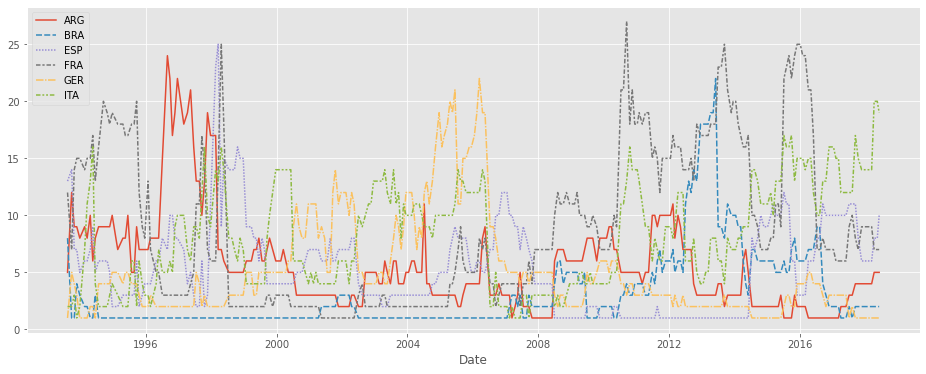

In [3]:
plt.figure(figsize=(16,6))
sns.lineplot(data=fifa_data)

# SPOTIFY (lineplot)

In [4]:
spotify_path = 'data/spotify.csv'
spotify_data = pd.read_csv(spotify_path, index_col='Date', parse_dates=True)
spotify_data
# sd.head() # sd.tail()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0


<AxesSubplot:title={'center':'Daily global streams of popular songs in 2017-2018'}, xlabel='Date'>

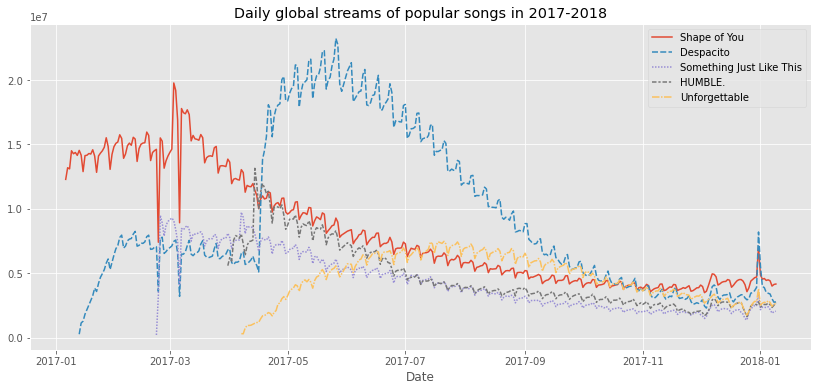

In [5]:
plt.figure(figsize=(14,6))
plt.title("Daily global streams of popular songs in 2017-2018")
sns.lineplot(data=spotify_data)

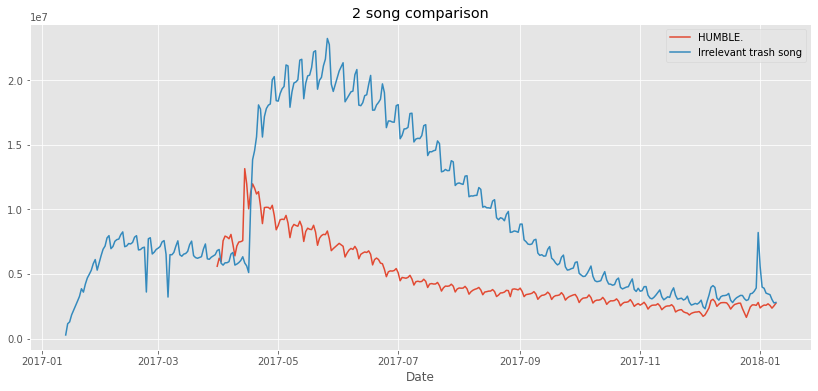

In [6]:
#list(spotify_data.columns)
plt.figure(figsize=(14,6))
plt.title("2 song comparison")
sns.lineplot(data=spotify_data['HUMBLE.'], label="HUMBLE.")
sns.lineplot(data=spotify_data['Despacito'], label="Irrelevant trash song")
plt.xlabel("Date")
plt.ylabel("")
plt.show()

# MUSEUM (lineplot)

In [7]:
museum_path = 'data/museum_visitors.csv'
museum_data = pd.read_csv(museum_path, index_col='Date', parse_dates=True)
museum_data.tail()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2018-07-01,23136,4191,2620,4718
2018-08-01,20815,4866,2409,3891
2018-09-01,21020,4956,2146,3180
2018-10-01,19280,4622,2364,3775
2018-11-01,17163,4082,2385,4562


<AxesSubplot:xlabel='Date'>

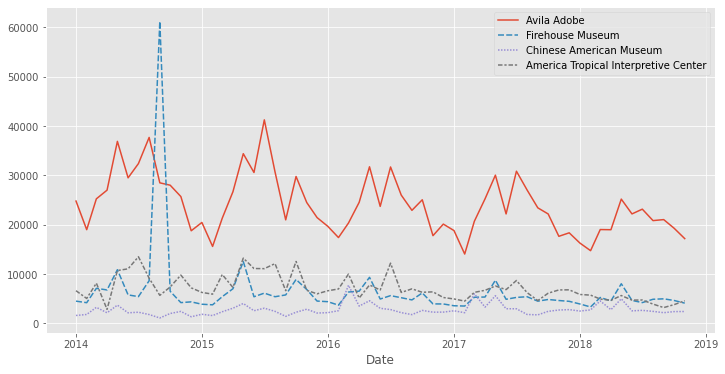

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=museum_data)

In [9]:
ca_museum_jul18 = museum_data['Chinese American Museum'] #.value_counts()
# first date - 01.01.2014
# we want 01.07.2018
# month diff = 12*4 + 7 = 55
# index = 55-1=54
ca_museum_jul18[54]

2620

In [10]:
ca_museum_jul18.index[0].date()

datetime.date(2014, 1, 1)

# FLIGHTS (barplot, heatmap)

In [11]:
flight_path = 'data/flight_delays.csv'
flight_data = pd.read_csv(flight_path, index_col='Month')
flight_data

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


Text(0, 0.5, 'Arrival delay (in minutes)')

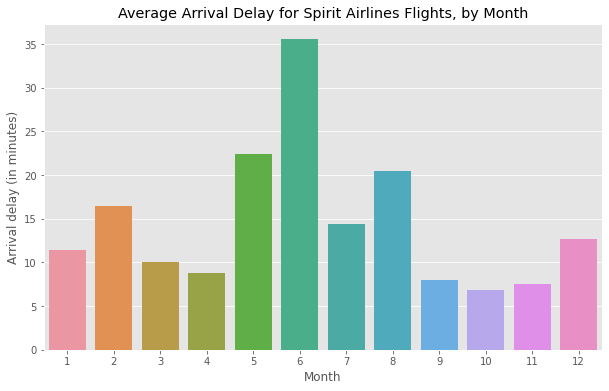

In [12]:
plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")
sns.barplot(x=flight_data.index, y=flight_data['NK'])
plt.ylabel("Arrival delay (in minutes)")

Text(0.5, 42.0, 'Airline')

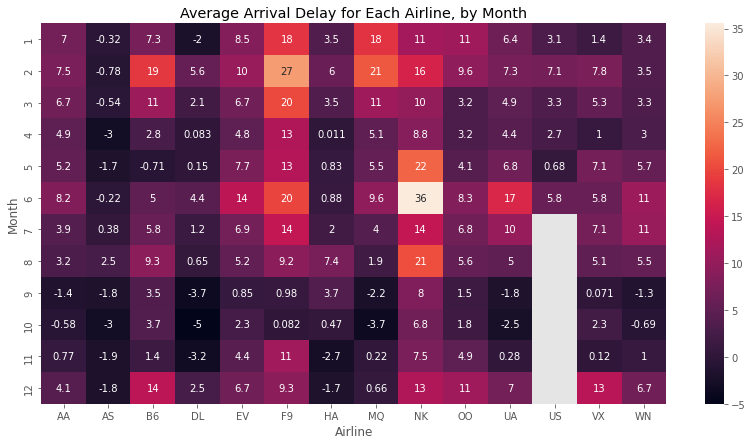

In [13]:
plt.figure(figsize=(14,7))
plt.title("Average Arrival Delay for Each Airline, by Month")
sns.heatmap(data=flight_data, annot=True)
plt.xlabel("Airline")

# IGN_GAME (barplot, heatmap)

`iloc` function has access to specified row of data frame.

In [14]:
ign_path = 'data/ign_scores.csv'
ign_data = pd.read_csv(ign_path, index_col='Platform')
ign_data

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000
Nintendo 64,6.649057,8.250000,7.000000,5.681250,6.889655,7.461538,6.050000,6.939623,8.042857,5.675000,6.967857,6.900000
Nintendo DS,5.903608,7.240000,6.259804,6.320000,6.840000,6.604615,7.222619,6.038636,6.965217,5.874359,5.936667,6.644737
Nintendo DSi,6.827027,8.500000,6.090909,7.500000,7.250000,6.810526,7.166667,6.563636,6.500000,5.195652,5.644444,6.566667
PC,6.805791,7.334746,7.136798,7.166667,7.410938,6.924706,7.759930,7.032418,7.084878,7.104889,6.902424,7.310207


In [15]:
ign_data_t = ign_data.transpose()
pd.set_option("display.max_columns", None)
ign_data_t

Platform,Dreamcast,Game Boy Advance,Game Boy Color,GameCube,Nintendo 3DS,Nintendo 64,Nintendo DS,Nintendo DSi,PC,PlayStation,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation Portable,PlayStation Vita,Wii,Wireless,Xbox,Xbox 360,Xbox One,iPhone
Action,6.882857,6.373077,6.272727,6.532584,6.670833,6.649057,5.903608,6.827027,6.805791,6.016406,6.467361,6.853819,7.550000,6.467797,7.173077,6.262718,7.041699,6.819512,6.719048,7.702857,6.865445
"Action, Adventure",7.511111,7.507692,8.166667,7.608333,7.481818,8.250000,7.240000,8.500000,7.334746,7.933333,7.250000,7.306154,7.835294,7.000000,6.133333,7.294643,7.312500,7.479032,7.137838,7.566667,7.764286
Adventure,6.281818,6.057143,5.307692,6.753846,7.414286,7.000000,6.259804,6.090909,7.136798,6.313725,6.315152,6.820988,7.388571,6.938095,8.057143,6.234043,6.972414,6.821429,6.857353,7.254545,7.745833
Fighting,8.200000,6.226316,4.500000,7.422222,6.614286,5.681250,6.320000,7.500000,7.166667,6.553731,7.306349,7.710938,7.280000,6.822222,7.527273,6.733333,6.740000,7.029630,7.552239,7.171429,6.087500
Platformer,8.340000,6.970588,6.352941,6.665714,7.503448,6.889655,6.840000,7.250000,7.410938,6.579070,7.068421,7.735714,8.390909,7.194737,8.568750,7.054255,7.509091,7.303448,7.559574,6.733333,7.471930
Puzzle,8.088889,6.532143,6.583333,6.133333,8.000000,7.461538,6.604615,6.810526,6.924706,6.757895,6.354545,7.350000,7.400000,6.726667,8.250000,6.426984,7.360550,5.125000,7.141026,8.100000,7.810784
RPG,7.700000,7.542857,7.285714,7.890909,7.719231,6.050000,7.222619,7.166667,7.759930,7.910000,7.473077,7.436111,7.944000,6.817778,7.337500,7.410345,8.260000,8.277778,7.650000,8.291667,7.185185
Racing,7.042500,6.657143,5.897436,6.852632,6.900000,6.939623,6.038636,6.563636,7.032418,6.773387,6.585065,6.978571,7.590000,6.401961,6.300000,5.011667,6.898305,7.021591,6.996154,8.163636,7.315789
Shooter,7.616667,6.444444,4.500000,6.981818,7.033333,8.042857,6.965217,6.500000,7.084878,6.424000,6.641667,7.219553,7.804444,7.071053,7.660000,6.479798,6.906780,7.485417,7.338153,8.020000,6.995588
Simulation,7.628571,6.928571,5.900000,8.028571,7.700000,5.675000,5.874359,5.195652,7.104889,6.918182,7.152632,7.142857,9.250000,6.761538,5.725000,6.327027,7.802857,7.155556,7.325000,7.733333,7.328571


<AxesSubplot:>

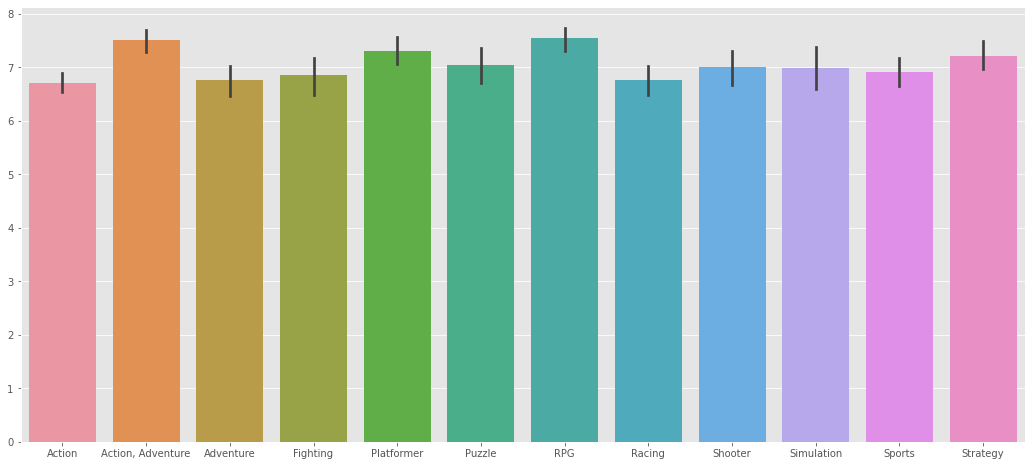

In [16]:
plt.figure(figsize=(18,8))
sns.barplot(data=ign_data)

<AxesSubplot:ylabel='Platform'>

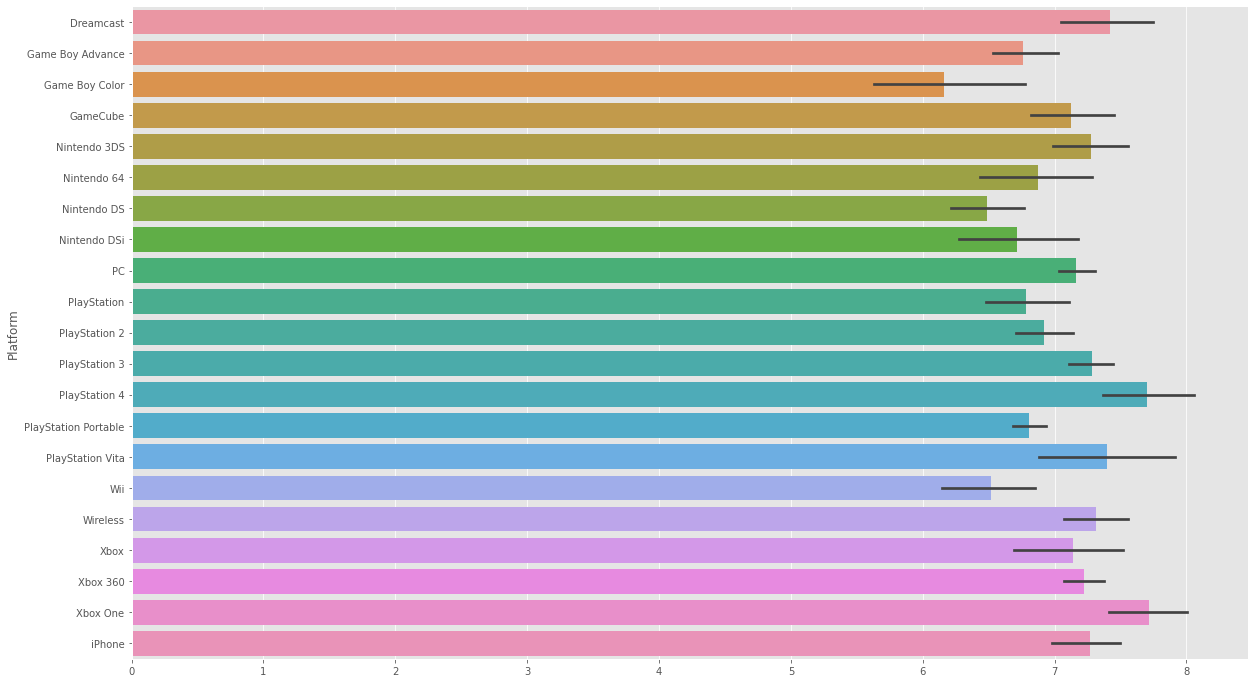

In [17]:
plt.figure(figsize=(20,12))
sns.barplot(data=ign_data_t, orient='h')
#sns.barplot(x=ign_data_t, y=ign_data_t.index)

In [18]:
worst = 1000000
best = -1
worst_genre = ''
best_genre = ''

for i in range(len(ign_data_t)):
    curr_score = sum(ign_data_t.iloc[i]) / len(ign_data_t.iloc[i])
    if curr_score < worst:
        worst = curr_score
        worst_genre = ign_data_t.index[i]
    if curr_score > best:
        best = curr_score
        best_genre = ign_data_t.index[i]

print('Best genre: {}, score: {}\nWorst genre: {}, score: {}'.format(best_genre,best,worst_genre, worst))

Best genre: RPG, score: 7.539588932655596
Worst genre: Action, score: 6.707490495214333


In [19]:
worst = 1000000
best = -1
worst_platform = ''
best_platform = ''

for i in range(len(ign_data)):
    curr_score = sum(ign_data.iloc[i]) / len(ign_data.iloc[i])
    if curr_score < worst:
        worst = curr_score
        worst_platform = ign_data.index[i]
    if curr_score > best:
        best = curr_score
        best_platform = ign_data.index[i]

print('Best platform: {}, score: {}\nWorst platform: {}, score: {}'.format(best_platform,best,worst_platform, worst))

Best platform: Xbox One, score: 7.714107142857142
Worst platform: Game Boy Color, score: 6.16310071787158


In [20]:
# Avg score for pc
indx = list(ign_data.index).index("PC")
score = sum(ign_data.iloc[indx]) / len(ign_data.iloc[indx])
print(score)

# Highest score for PC
score = max(ign_data.iloc[indx])
print(score)

7.164532551920284
7.759930313588847


Text(0.5, 1.0, 'Average Score for Racing Games by Platform')

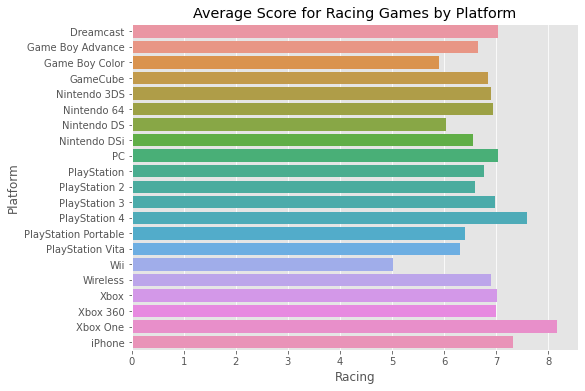

In [21]:
# Average for racing games
plt.figure(figsize=(8,6))
sns.barplot(x=ign_data['Racing'],y=ign_data.index)
plt.title("Average Score for Racing Games by Platform")

<AxesSubplot:ylabel='Platform'>

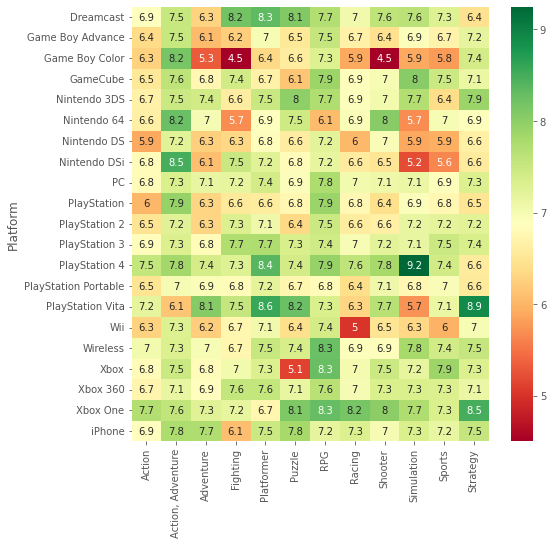

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(data=ign_data, annot=True, cmap='RdYlGn')

# INSURANCE (scatterplot)

In [23]:
insurance_path = 'data/insurance.csv'
insurance_data = pd.read_csv(insurance_path)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='bmi', ylabel='charges'>

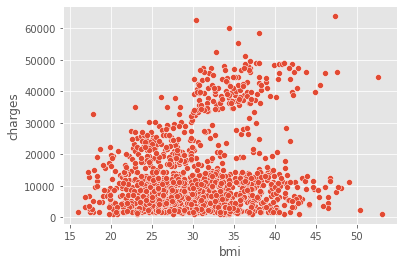

In [24]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

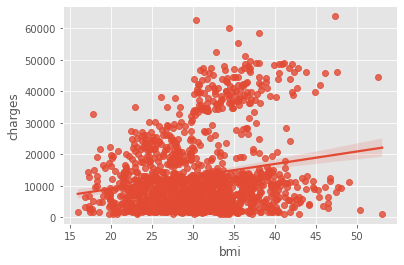

In [25]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

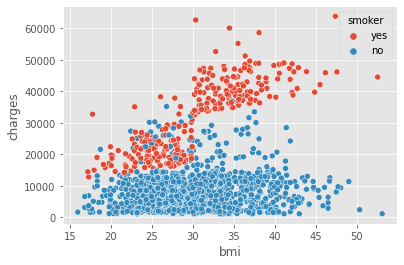

In [26]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

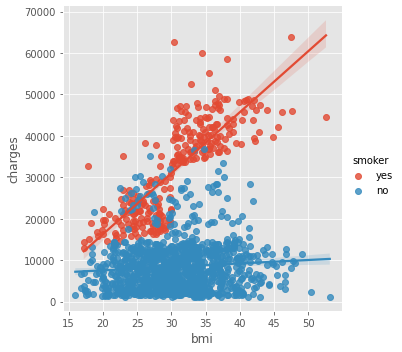

In [27]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance_data)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

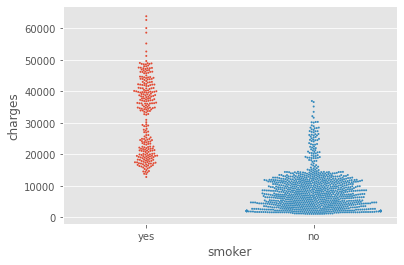

In [28]:
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'], s=2) 
# s-> changing size of markers

# CANDY (scatterplot)

In [29]:
candy_path = 'data/candy.csv'
candy_data = pd.read_csv(candy_path, index_col='id')
candy_data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Twizzlers,No,Yes,No,No,No,No,No,No,No,0.220,0.116,45.466282
79,Warheads,No,Yes,No,No,No,No,Yes,No,No,0.093,0.116,39.011898
80,Welch's Fruit Snacks,No,Yes,No,No,No,No,No,No,Yes,0.313,0.313,44.375519


In [31]:
# The most sugar
i = candy_data['sugarpercent'].idxmax()
print("The most sugar level: {}, competition name: {}".format(candy_data.sugarpercent[i], candy_data['competitorname'][i]))

The most sugar level: 0.98799998, competition name: Reese's stuffed with pieces


<AxesSubplot:xlabel='sugarpercent', ylabel='winpercent'>

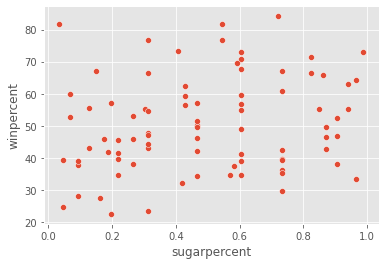

In [32]:
sns.scatterplot(x=candy_data['sugarpercent'],y=candy_data['winpercent'])

<AxesSubplot:xlabel='sugarpercent', ylabel='winpercent'>

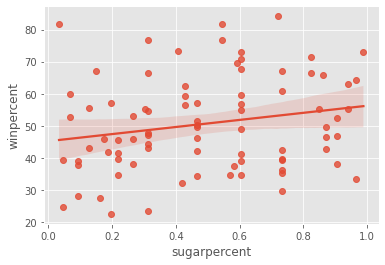

In [33]:
sns.regplot(x=candy_data['sugarpercent'],y=candy_data['winpercent'])

<AxesSubplot:xlabel='pricepercent', ylabel='winpercent'>

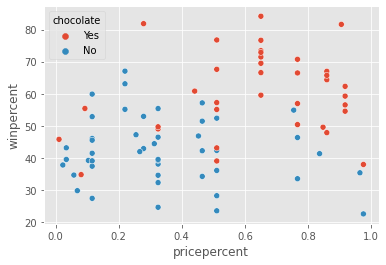

In [34]:
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

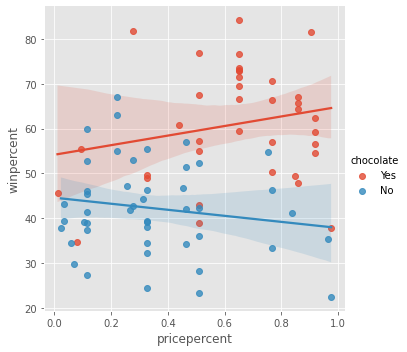

In [35]:
sns.lmplot(x='pricepercent', y='winpercent', hue='chocolate', data=candy_data)

<AxesSubplot:xlabel='chocolate', ylabel='winpercent'>

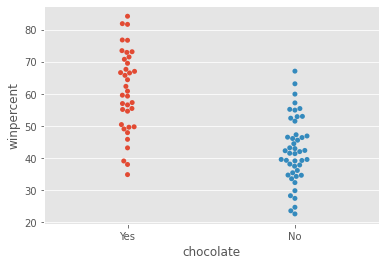

In [36]:
sns.swarmplot(x=candy_data['chocolate'],y=candy_data['winpercent'])
# better plot than the one above.

# IRIS (histogram, kde)

In [37]:
iris_path = 'data/iris.csv'
iris_data = pd.read_csv(iris_path, index_col="Id")
iris_data

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Count'>

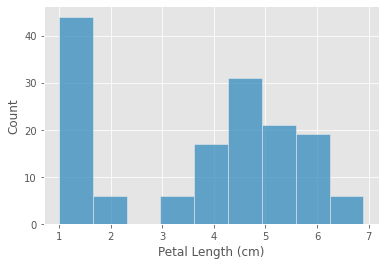

In [38]:
sns.histplot(iris_data['Petal Length (cm)'])

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Density'>

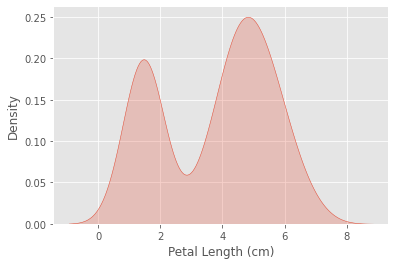

In [39]:
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

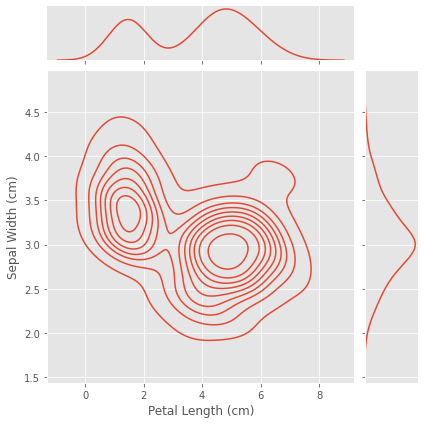

In [40]:
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind='kde')

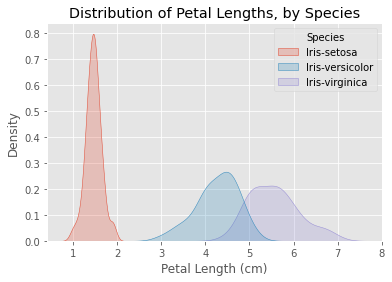

In [41]:
sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue="Species", shade=True)
plt.title("Distribution of Petal Lengths, by Species")
print(end="")

# CANCER (histogram, kde)

In [42]:
cancer_path = 'data/cancer.csv'
cancer_data = pd.read_csv(cancer_path, index_col='Id')
cancer_data

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,0.9622,1.0260,8.758,118.800,0.006399,0.043100,0.07845,0.026240,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,1.1760,1.2560,7.673,158.700,0.010300,0.028910,0.05198,0.024540,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.040,0.005769,0.024230,0.03950,0.016780,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637


In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(cancer_data)
#profile

In [43]:
# largest value for Perimeter (mean)
m = max(cancer_data['Perimeter (mean)'])
i = list(cancer_data['Perimeter (mean)']).index(m)
# i = cancer_data['Perimeter (mean)'].idxmax()
print("Largest perimeter (mean): {}, Id: {}".format(m,cancer_data.index[i]))

Largest perimeter (mean): 188.5, Id: 8810703


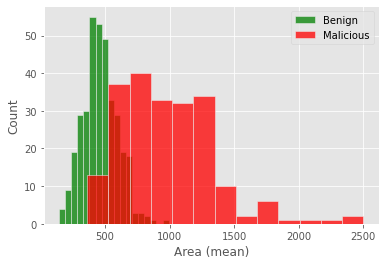

In [44]:
#sns.histplot(cancer_data['Area (mean)'], hue=cancer_data['Diagnosis'])
cancer_m = cancer_data[cancer_data.Diagnosis == 'M']
cancer_b = cancer_data[cancer_data.Diagnosis == "B"]

sns.histplot(cancer_b['Area (mean)'], label='Benign', color='g')
sns.histplot(cancer_m['Area (mean)'], label='Malicious', color='r')

plt.legend()

<AxesSubplot:xlabel='Area (mean)', ylabel='Count'>

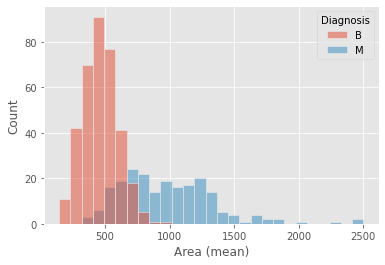

In [45]:
sns.histplot(data=cancer_data, x='Area (mean)', hue='Diagnosis')

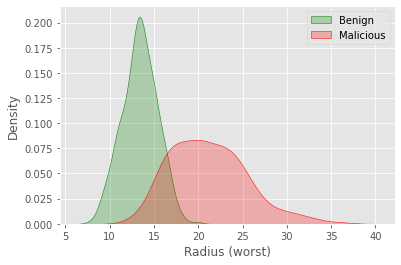

In [46]:
sns.kdeplot(data=cancer_b['Radius (worst)'], shade=True, label='Benign', color='g')
sns.kdeplot(data=cancer_m['Radius (worst)'], shade=True, label='Malicious', color='r')
plt.legend()

<AxesSubplot:xlabel='Area (mean)', ylabel='Density'>

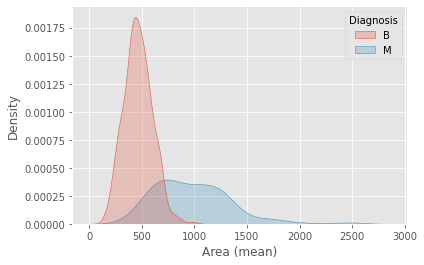

In [50]:
sns.kdeplot(data=cancer_data, x='Area (mean)', hue='Diagnosis', shade=True)

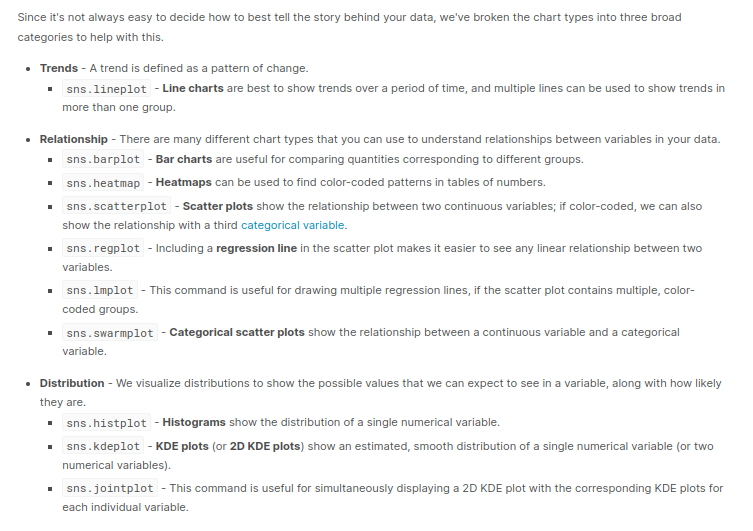

### Seaborn styles:
- `darkgrid`
- `whitegrid`
- `dark`
- `white`
- `ticks` 
<br> <br> To change style: `sns.set_style('stylename')`

# IRIS (pie chart)

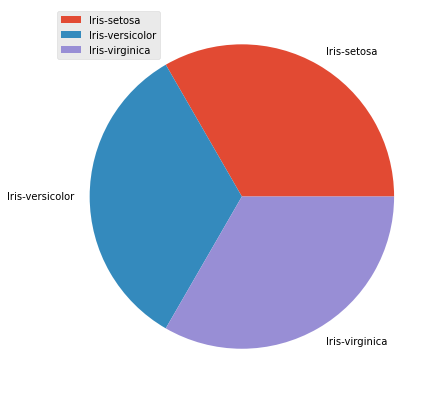

In [51]:
setosa = len(iris_data.loc[iris_data.Species == 'Iris-setosa'])
versi = len(iris_data.loc[iris_data.Species == 'Iris-versicolor'])
virgin = len(iris_data.loc[iris_data.Species == 'Iris-virginica'])

y = np.array([setosa, versi, virgin])
lbls = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plt.figure(figsize=(7,7))
plt.pie(y, labels = lbls)
plt.legend()
plt.show()